In [ ]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import quantile_transform
# for hyperparemeter optimisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change the file names

meth = pd.read_csv('/content/drive/MyDrive/methy',delim_whitespace=True).transpose(copy = True)
mirna = pd.read_csv('/content/drive/MyDrive/mirna',delim_whitespace=True).transpose(copy = True)
exp = pd.read_csv('/content/drive/MyDrive/exp',delim_whitespace=True).transpose(copy = True)
surv = pd.read_csv('/content/drive/MyDrive/survival',delim_whitespace=True, index_col=0)
clinic = pd.read_csv('/content/drive/MyDrive/20150821-LIHC-Clinical.txt', index_col=0, sep='\t').transpose(copy = True)
#print(meth['cg00674365'])

#Exploratory Data Analysis

In [ ]:
#analysing clinical data
clinic.head()

Hybridization REF Composite Element REF years_to_birth vital_status  \
tcga-2y-a9gs                      value             58            1   
tcga-2y-a9gt                      value             51            1   
tcga-2y-a9gu                      value             55            0   
tcga-2y-a9gv                      value             54            1   
tcga-2y-a9gw                      value             64            1   

Hybridization REF days_to_death days_to_last_followup tumor_tissue_site  \
tcga-2y-a9gs                724                   NaN             liver   
tcga-2y-a9gt               1624                   NaN             liver   
tcga-2y-a9gu                NaN                  1939             liver   
tcga-2y-a9gv               2532                   NaN             liver   
tcga-2y-a9gw               1271                   NaN             liver   

Hybridization REF pathologic_stage pathology_T_stage pathology_N_stage  \
tcga-2y-a9gs              stage iv                t2                nx   
tcga-2y-a9gt               stage i                t1                nx   
tcga-2y-a9gu               stage i                t1                nx   
tcga-2y-a9gv               stage i                t1                nx   
tcga-2y-a9gw               stage i                t1                n0   

Hybridization REF pathology_M_stage  gender  \
tcga-2y-a9gs                     mx    male   
tcga-2y-a9gt                     mx    male   
tcga-2y-a9gu                     mx  female   
tcga-2y-a9gv                     mx  female   
tcga-2y-a9gw                     mx    male   

Hybridization REF date_of_initial_pathologic_diagnosis  \
tcga-2y-a9gs                                      2006   
tcga-2y-a9gt                                      2006   
tcga-2y-a9gu                                      2009   
tcga-2y-a9gv                                      2007   
tcga-2y-a9gw                                      2007   

Hybridization REF days_to_last_known_alive radiation_therapy  \
tcga-2y-a9gs                           NaN                no   
tcga-2y-a9gt                           NaN                no   
tcga-2y-a9gu                           NaN                no   
tcga-2y-a9gv                           NaN                no   
tcga-2y-a9gw                           NaN                no   

Hybridization REF         histological_type residual_tumor   race  \
tcga-2y-a9gs       hepatocellular carcinoma             r0  white   
tcga-2y-a9gt       hepatocellular carcinoma             r0  white   
tcga-2y-a9gu       hepatocellular carcinoma             r0  white   
tcga-2y-a9gv       hepatocellular carcinoma             r0  white   
tcga-2y-a9gw       hepatocellular carcinoma             r0  white   

Hybridization REF               ethnicity  
tcga-2y-a9gs           hispanic or latino  
tcga-2y-a9gt       not hispanic or latino  
tcga-2y-a9gu       not hispanic or latino  
tcga-2y-a9gv       not hispanic or latino  
tcga-2y-a9gw       not hispanic or latino

In [ ]:
print(clinic.shape)

(368, 18)


Removing unnecessary columns

In [ ]:
#Checking null and unique counts of values in the columns of clinical data
null_counts = clinic.isnull().sum()
unique_counts = clinic.nunique()
print("NULL COUNT:\n",null_counts)
print("\nUNIQUE COUNT:\n",unique_counts)

NULL COUNT:
 Hybridization REF
Composite Element REF                     0
years_to_birth                            3
vital_status                              0
days_to_death                           236
days_to_last_followup                    91
tumor_tissue_site                         0
pathologic_stage                         22
pathology_T_stage                         1
pathology_N_stage                         1
pathology_M_stage                         0
gender                                    0
date_of_initial_pathologic_diagnosis      2
days_to_last_known_alive                368
radiation_therapy                        19
histological_type                         0
residual_tumor                            7
race                                     10
ethnicity                                17
dtype: int64

UNIQUE COUNT:
 Hybridization REF
Composite Element REF                     1
years_to_birth                           63
vital_status                              

In [ ]:
clinic = clinic.drop(["Composite Element REF", "days_to_last_known_alive"], axis=1)
clinic.head()

Hybridization REF years_to_birth vital_status days_to_death  \
tcga-2y-a9gs                  58            1           724   
tcga-2y-a9gt                  51            1          1624   
tcga-2y-a9gu                  55            0           NaN   
tcga-2y-a9gv                  54            1          2532   
tcga-2y-a9gw                  64            1          1271   

Hybridization REF days_to_last_followup tumor_tissue_site pathologic_stage  \
tcga-2y-a9gs                        NaN             liver         stage iv   
tcga-2y-a9gt                        NaN             liver          stage i   
tcga-2y-a9gu                       1939             liver          stage i   
tcga-2y-a9gv                        NaN             liver          stage i   
tcga-2y-a9gw                        NaN             liver          stage i   

Hybridization REF pathology_T_stage pathology_N_stage pathology_M_stage  \
tcga-2y-a9gs                     t2                nx                mx   
tcga-2y-a9gt                     t1                nx                mx   
tcga-2y-a9gu                     t1                nx                mx   
tcga-2y-a9gv                     t1                nx                mx   
tcga-2y-a9gw                     t1                n0                mx   

Hybridization REF  gender date_of_initial_pathologic_diagnosis  \
tcga-2y-a9gs         male                                 2006   
tcga-2y-a9gt         male                                 2006   
tcga-2y-a9gu       female                                 2009   
tcga-2y-a9gv       female                                 2007   
tcga-2y-a9gw         male                                 2007   

Hybridization REF radiation_therapy         histological_type residual_tumor  \
tcga-2y-a9gs                     no  hepatocellular carcinoma             r0   
tcga-2y-a9gt                     no  hepatocellular carcinoma             r0   
tcga-2y-a9gu                     no  hepatocellular carcinoma             r0   
tcga-2y-a9gv                     no  hepatocellular carcinoma             r0   
tcga-2y-a9gw                     no  hepatocellular carcinoma             r0   

Hybridization REF   race               ethnicity  
tcga-2y-a9gs       white      hispanic or latino  
tcga-2y-a9gt       white  not hispanic or latino  
tcga-2y-a9gu       white  not hispanic or latino  
tcga-2y-a9gv       white  not hispanic or latino  
tcga-2y-a9gw       white  not hispanic or latino

Joining clinical table and Survival table so as to retrieve similar IDs like rest of the datasets for the clinical data

In [ ]:
#clinical table combined with Survival table
clinic = clinic.reset_index().rename(columns={'index': 'PatientID'})
surv = surv.reset_index().rename(columns={'PatientID': 'PatientID'})

def convert(id):
    new_id = id.lower() #lower case
    return new_id[:-3] #remving last three letters, "TCGA-2V-A9GS-01" becomes "tcga-2y-a9gs"

surv['PatientID_edit'] = surv['PatientID'].apply(convert)
clinical_Data = pd.merge(surv, clinic, left_on="PatientID_edit", right_on="PatientID", how="left")
clinical_Data.drop("PatientID_edit", axis=1, inplace=True)
clinical_Data.set_index('PatientID_x', inplace=True)
clinical_Data.rename(columns={'PatientID_y': 'PatientID'}, inplace=True)
print(clinical_Data.head())
print(clinical_Data.shape)

                 Survival  Death     PatientID years_to_birth vital_status  \
PatientID_x                                                                  
TCGA-2V-A95S-01       NaN    NaN           NaN            NaN          NaN   
TCGA-2Y-A9GS-01     724.0    1.0  tcga-2y-a9gs             58            1   
TCGA-2Y-A9GT-01    1624.0    1.0  tcga-2y-a9gt             51            1   
TCGA-2Y-A9GU-01    1939.0    0.0  tcga-2y-a9gu             55            0   
TCGA-2Y-A9GV-01    2532.0    1.0  tcga-2y-a9gv             54            1   

                days_to_death days_to_last_followup tumor_tissue_site  \
PatientID_x                                                             
TCGA-2V-A95S-01           NaN                   NaN               NaN   
TCGA-2Y-A9GS-01           724                   NaN             liver   
TCGA-2Y-A9GT-01          1624                   NaN             liver   
TCGA-2Y-A9GU-01           NaN                  1939             liver   
TCGA-2Y-A9GV-01

Visualizing data

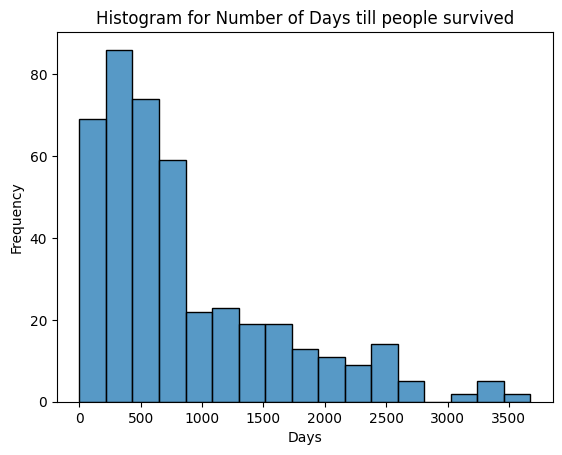

In [ ]:
#Histogram for Number of Days till people survived
sns.histplot(data=clinical_Data['Survival'])

plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram for Number of Days till people survived')

plt.show()

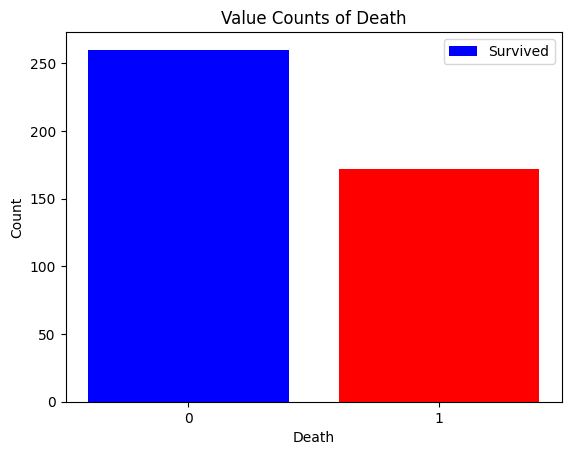

In [ ]:
value_counts = clinical_Data["Death"].value_counts()

colors = ['blue', 'red']

plt.bar(value_counts.index, value_counts.values, color=colors)

plt.xticks([0, 1])

plt.xlabel("Death")
plt.ylabel("Count")
plt.title("Value Counts of Death")

legend_labels = ["Survived", "Deceased"]
plt.legend(legend_labels)
plt.show()


In [ ]:
grouped_data = clinical_Data.groupby(['Death', 'gender']).size().unstack()
print(grouped_data)


gender  female  male
Death               
0.0         73   180
1.0         67   105


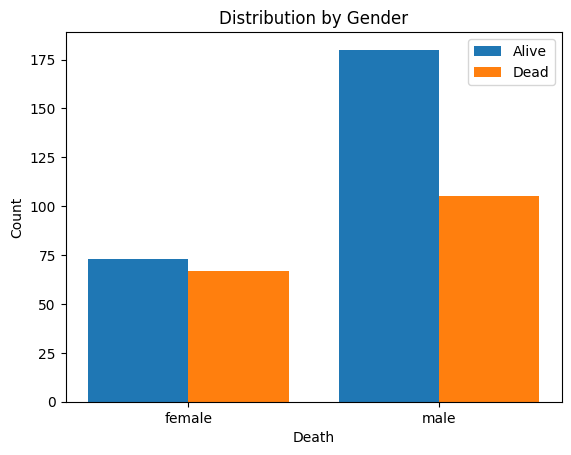

In [ ]:
survived_data = (grouped_data.loc[0.0].values).tolist()
diceased_data = (grouped_data.loc[1.0].values).tolist()

x = np.arange(len(diceased_data))
width = 0.4

plt.bar(x - width/2, survived_data, width, label='Alive')
plt.bar(x + width/2, diceased_data, width, label='Dead')

plt.xlabel('Death')
plt.ylabel('Count')
plt.title('Distribution by Gender')

plt.xticks(x, grouped_data.columns)

plt.legend()

plt.show()

In [ ]:
grouped_data = clinical_Data.groupby(['Death', 'pathologic_stage']).size().unstack()
print(grouped_data)

pathologic_stage  stage i  stage ii  stage iii  stage iiia  stage iiib  \
Death                                                                    
0.0                 137.0      63.0        2.0        30.0         5.0   
1.0                  57.0      35.0        4.0        40.0         4.0   

pathologic_stage  stage iiic  stage iv  stage iva  stage ivb  
Death                                                         
0.0                      4.0       NaN        1.0        NaN  
1.0                      6.0       3.0        NaN        2.0  


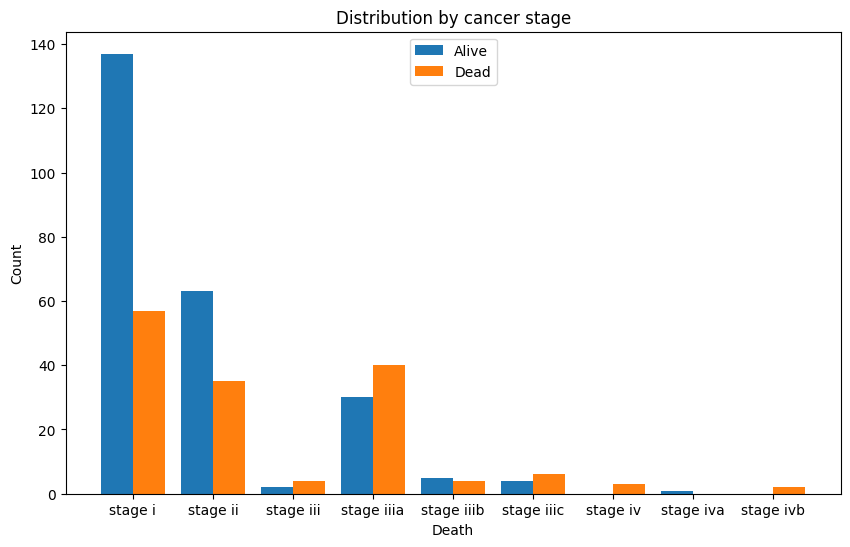

In [ ]:
survived_data = grouped_data.loc[0.0].values.tolist()
deceased_data = grouped_data.loc[1.0].values.tolist()

x = np.arange(len(deceased_data))
width = 0.4

fig = plt.figure(figsize=(10, 6))
plt.bar(x - width/2, survived_data, width, label='Alive')
plt.bar(x + width/2, deceased_data, width, label='Dead')

plt.xlabel('Death')
plt.ylabel('Count')
plt.title('Distribution by cancer stage')

plt.xticks(x, grouped_data.columns)

plt.legend()

plt.show()

Most of the data is available for stage i and stage ii cancer. This is the reason why most of the data is available for class 0(surviving).

In [ ]:
grouped_data = grouped_data.fillna(0)
grouped_data

pathologic_stage  stage i  stage ii  stage iii  stage iiia  stage iiib  \
Death                                                                    
0.0                 137.0      63.0        2.0        30.0         5.0   
1.0                  57.0      35.0        4.0        40.0         4.0   

pathologic_stage  stage iiic  stage iv  stage iva  stage ivb  
Death                                                         
0.0                      4.0       0.0        1.0        0.0  
1.0                      6.0       3.0        0.0        2.0

In [ ]:
grouped_data = clinical_Data.groupby(['Death', 'pathologic_stage']).size().unstack()

#print("......................................................")
filtered_data = clinical_Data[(clinical_Data['pathologic_stage'] == 'stage i') & (clinical_Data['Death'] == 0)]
filtered_data1 = clinical_Data[(clinical_Data['pathologic_stage'] == 'stage ii') & (clinical_Data['Death'] == 0)]
#print(filtered_data)
#print(".......................................................")
reduced_data = filtered_data.sample(n=57, random_state=42)
reduced_data1 = filtered_data1.sample(n=35, random_state=42)
# Update the clinical_Data DataFrame with the reduced samples
clinical_Data = clinical_Data.drop(filtered_data.index)  # Remove the filtered samples
clinical_Data = pd.concat([clinical_Data, reduced_data])  # Add the reduced samples back to the DataFrame
clinical_Data = clinical_Data.drop(filtered_data1.index)  # Remove the filtered samples
clinical_Data = pd.concat([clinical_Data, reduced_data1])  # Add the reduced samples back to the DataFrame
clinical_Data['pathologic_stage'] = clinical_Data['pathologic_stage'].replace(['stage iii','stage iiia', 'stage iiib', 'stage iiic'], 'stage iii')
clinical_Data['pathologic_stage'] = clinical_Data['pathologic_stage'].replace(['stage iv','stage iva', 'stage ivb'], 'stage iv')
#print(clinical_Data)
grouped_data = clinical_Data.groupby(['Death', 'pathologic_stage']).size().unstack()
print(grouped_data)

pathologic_stage  stage i  stage ii  stage iii  stage iv
Death                                                   
0.0                    57        35         41         1
1.0                    57        35         54         5


Samples for Tumor type i and ii are balanced. stage iii and stage iv data are merged

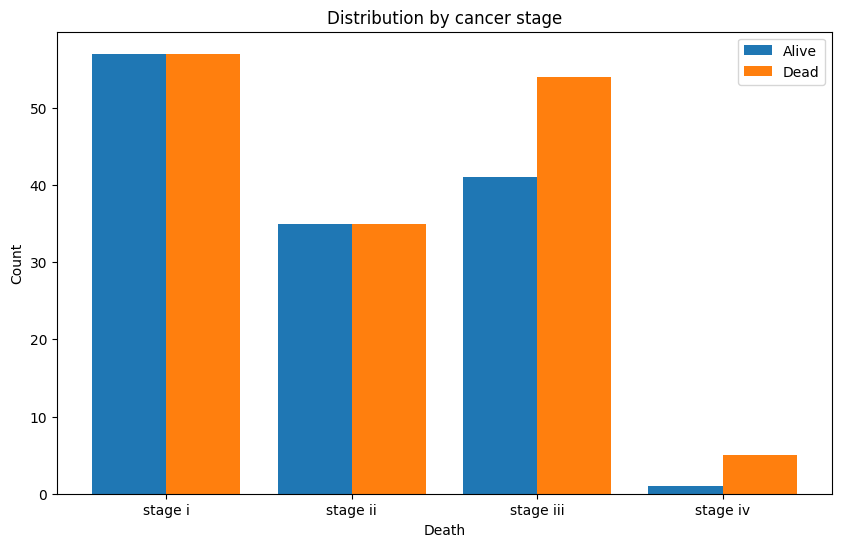

In [ ]:
survived_data = grouped_data.loc[0.0].values.tolist()
deceased_data = grouped_data.loc[1.0].values.tolist()

x = np.arange(len(deceased_data))
width = 0.4

fig = plt.figure(figsize=(10, 6))
plt.bar(x - width/2, survived_data, width, label='Alive')
plt.bar(x + width/2, deceased_data, width, label='Dead')

plt.xlabel('Death')
plt.ylabel('Count')
plt.title('Distribution by cancer stage')

plt.xticks(x, grouped_data.columns)

plt.legend()

plt.show()

gender  female  male
Death               
0.0         47    98
1.0         67   105


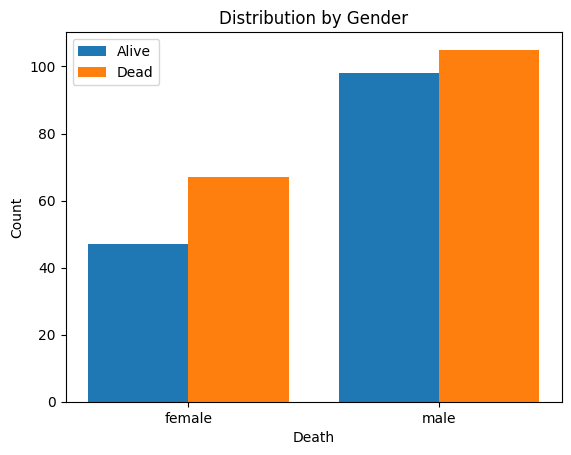

In [ ]:
grouped_data = clinical_Data.groupby(['Death', 'gender']).size().unstack()
print(grouped_data)

survived_data = (grouped_data.loc[0.0].values).tolist()
diceased_data = (grouped_data.loc[1.0].values).tolist()

x = np.arange(len(diceased_data))
width = 0.4

plt.bar(x - width/2, survived_data, width, label='Alive')
plt.bar(x + width/2, diceased_data, width, label='Dead')

plt.xlabel('Death')
plt.ylabel('Count')
plt.title('Distribution by Gender')

plt.xticks(x, grouped_data.columns)

plt.legend()

plt.show()

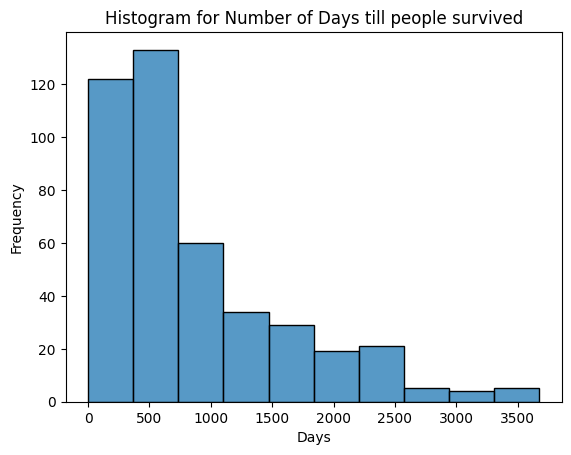

In [ ]:
# Create the histogram using seaborn
sns.histplot(data=surv['Survival'], bins=10)  # Adjust the number of bins as per your requirement

# Set labels and title
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram for Number of Days till people survived')

# Display the histogram
plt.show()

DATA FOR DIFFERENTIALLY EXPRESSED GENES ANALYSIS

In [ ]:
print(clinical_Data.shape)
clinical_Data.to_csv('clinical_Data.csv', index=True)

(330, 19)


In [ ]:
meth_diff = pd.read_csv('/content/drive/MyDrive/new_up/Diff_methylupdated.csv', index_col=0).transpose(copy = True)
mirna_diff = pd.read_csv('/content/drive/MyDrive/new_up/Diff_mirnaupdated.csv', index_col=0).transpose(copy = True)
exp_diff = pd.read_csv('/content/drive/MyDrive/new_up/Diff_mrnaupdated.csv', index_col=0).transpose(copy = True)
#print(meth_diff)
# Exclude the first column from the conversion
m_values = meth_diff.iloc[:,:]

# Apply the conversion formula to each M value
beta_values = np.exp2(m_values) / (np.exp2(m_values) + 1)

# Insert the first column back into the resulting DataFrame
beta_df = pd.concat([beta_values], axis=1)
meth_diff=beta_df


In [ ]:
print(meth_diff.shape)
print(mirna_diff.shape)
print(exp_diff.shape)


meth1=meth_diff.copy()
mirna1=mirna_diff.copy()
exp1=exp_diff.copy()
exp1
# print(meth1)
print(mirna1)
# print(exp1)

(404, 24)
(404, 4)
(404, 181)
V1               hsa.mir.1258   hsa.mir.217  hsa.mir.372  hsa.mir.466
TCGA.2Y.A9GS.01      0.299971  11624.779950     0.000000     0.749928
TCGA.2Y.A9GT.01      8.176924  14845.910100     0.281963     0.000000
TCGA.2Y.A9GU.01      0.000000     56.443052     0.000000     0.000000
TCGA.2Y.A9GV.01      4.340204   1936.815858     0.271263     0.271263
TCGA.2Y.A9GW.01      0.133563    115.398362     0.267126     0.000000
...                       ...           ...          ...          ...
TCGA.ZS.A9CD.01      0.327457    659.825115     0.163728     0.163728
TCGA.ZS.A9CE.01      0.000000   6138.020593     0.515930     0.000000
TCGA.ZS.A9CF.01      5.819796  23368.974500     0.554266     0.000000
TCGA.ZS.A9CF.02      3.156364  24199.839900     0.526061     0.175354
TCGA.ZS.A9CG.01      0.000000     20.809433     5.405048   140.531235

[404 rows x 4 columns]


In [ ]:
meth1.reset_index(inplace=True)
meth1.rename(columns={'index': 'PatientID'}, inplace=True)
meth1['PatientID'] = meth1['PatientID'].str.replace('.', '-', regex=False)
#meth1

meth1 = pd.merge(clinical_Data['Death'], meth1, left_on='PatientID_x', right_on='PatientID')
meth1 = meth1.dropna(subset=['Death'])
meth1.set_index(meth1.columns[1], inplace=True)
#print(meth1)

In [ ]:
mirna1.reset_index(inplace=True)
mirna1.rename(columns={'index': 'PatientID'}, inplace=True)
mirna1['PatientID'] = mirna1['PatientID'].str.replace('.', '-', regex=False)
#mirna1

mirna1 = pd.merge(clinical_Data['Death'], mirna1, left_on='PatientID_x', right_on='PatientID')
mirna1 = mirna1.dropna(subset=['Death'])
mirna1.set_index(mirna1.columns[1], inplace=True)
#print(mirna1)

In [ ]:
exp1.reset_index(inplace=True)
exp1.rename(columns={'index': 'PatientID'}, inplace=True)
exp1['PatientID'] = exp1['PatientID'].str.replace('.', '-', regex=False)
#exp1

exp1 = pd.merge(clinical_Data['Death'], exp1, left_on='PatientID_x', right_on='PatientID')
exp1 = exp1.dropna(subset=['Death'])
exp1.set_index(exp1.columns[1], inplace=True)
#print(exp1)

In [ ]:
from google.colab import files
# meth1.to_csv('methforq.csv', index=True)

# # Download the CSV file
# files.download('methforq.csv')
# mirna1.to_csv('mirnaforq.csv', index=True)

# # Download the CSV file
# files.download('mirnaforq.csv')
# exp1.to_csv('expforq.csv', index=True)

# # Download the CSV file
# files.download('expforq.csv')

In [ ]:
# Apply quantile normalization using the 'quantile_transform' function
meth1.iloc[:, 1:] = quantile_transform(meth1.iloc[:, 1:], copy=True)
transformer = QuantileTransformer(output_distribution="normal").fit(meth1.iloc[:, 1:])
scale_meth = pd.DataFrame(transformer.transform(meth1.iloc[:, 1:]))
scale_meth.columns = meth1.iloc[:, 1:].columns
scale_meth.index = meth1.index
#meth = meth1

#Log2 transformation
mirna1.iloc[:, 1:] = np.log2(mirna1.iloc[:, 1:]+1)
scaler = StandardScaler().fit(mirna1.iloc[:, 1:])
scale_mirna = pd.DataFrame(scaler.transform(mirna1.iloc[:, 1:]))
scale_mirna.columns = mirna1.iloc[:, 1:].columns
scale_mirna.index = mirna1.index

#Log2 transformation and scaling for
exp1.iloc[:,1:] = np.log2(exp1.iloc[:,1:]+1)
scaler = StandardScaler().fit(exp1.iloc[:,1:])
scale_exp = pd.DataFrame(scaler.transform(exp1.iloc[:,1:]))
scale_exp.columns = exp1.iloc[:, 1:].columns
scale_exp.index = exp1.index

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (299). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (299). n_quantiles is set to n_samples.
  warnings.warn(


In [ ]:
#print(meth1)
# print(mirna1)
# print(exp1)

#Scaling the data
#scale_meth

In [ ]:
concat_data = pd.concat([scale_meth, scale_mirna, scale_exp], axis=1)
concat_data.shape

(299, 209)

In [ ]:
concat_data.head()

cg00674365  cg00907288  cg02604524  cg02767633  cg03063639  \
PatientID                                                                     
TCGA-2Y-A9GS-01   -0.160505   -1.379355   -0.976415   -0.246404    0.042070   
TCGA-2Y-A9GT-01    0.711927   -0.050490   -0.016824   -0.050490    0.547708   
TCGA-2Y-A9GV-01    0.360971   -0.177570   -0.789996    0.025237   -0.211862   
TCGA-2Y-A9GW-01    0.343073    0.237743    0.848835   -0.084214    0.433806   
TCGA-2Y-A9GY-01   -0.824957   -1.240569   -1.091239   -0.220472   -0.711927   

                 cg04223671  cg04283162  cg05452406  cg07589773  cg07765706  \
PatientID                                                                     
TCGA-2Y-A9GS-01   -0.126509   -0.042070   -0.607342   -0.084214   -0.577268   
TCGA-2Y-A9GT-01    0.169032    0.923581    0.016824    1.240569   -0.186122   
TCGA-2Y-A9GV-01    0.281244    0.008412   -0.316428    0.075776   -0.025237   
TCGA-2Y-A9GW-01    0.109568    1.046561    0.415396    0.836836   -0.143486   
TCGA-2Y-A9GY-01   -1.240569   -0.378986   -0.679779   -0.118035   -0.169032   

                 ...  TKTL1.8277  TMC4.147798  TREM1.54210  TRIM50.135892  \
PatientID        ...                                                        
TCGA-2Y-A9GS-01  ...    0.184530    -0.177837     0.597823      -0.520613   
TCGA-2Y-A9GT-01  ...   -0.190546    -0.309482    -0.804535      -0.362932   
TCGA-2Y-A9GV-01  ...   -0.035203    -0.356081    -0.639097      -0.019753   
TCGA-2Y-A9GW-01  ...   -0.254938     0.302773     0.654334      -1.185525   
TCGA-2Y-A9GY-01  ...    1.634976    -0.967828     0.991460      -1.185525   

                 TRIM54.57159  UPK1A.11045  VIPR2.7434  VTCN1.79679  \
PatientID                                                             
TCGA-2Y-A9GS-01     -0.075380     1.162839    1.259817     0.855374   
TCGA-2Y-A9GT-01     -1.008541     1.817446   -0.564081    -0.501862   
TCGA-2Y-A9GV-01     -0.430234    -1.059715   -1.103629    -1.148434   
TCGA-2Y-A9GW-01      0.533733    -0.617359   -0.097562     0.525102   
TCGA-2Y-A9GY-01      0.921444     2.869160    0.174663    -0.673933   

                 ZNF385D.79750  ZPLD1.131368  
PatientID                                     
TCGA-2Y-A9GS-01       0.211260      2.249889  
TCGA-2Y-A9GT-01      -0.029677     -0.874699  
TCGA-2Y-A9GV-01       0.102221     -0.874699  
TCGA-2Y-A9GW-01      -0.101320     -0.540017  
TCGA-2Y-A9GY-01      -0.992884      3.051301  

[5 rows x 209 columns]

In [ ]:
concat_data.reset_index(inplace=True)
concat_data.rename(columns={'index': 'PatientID'}, inplace=True)
concat_data['PatientID'] = concat_data['PatientID'].str.replace('.', '-', regex=False)
concat_data

PatientID  cg00674365  cg00907288  cg02604524  cg02767633  \
0    TCGA-2Y-A9GS-01   -0.160505   -1.379355   -0.976415   -0.246404   
1    TCGA-2Y-A9GT-01    0.711927   -0.050490   -0.016824   -0.050490   
2    TCGA-2Y-A9GV-01    0.360971   -0.177570   -0.789996    0.025237   
3    TCGA-2Y-A9GW-01    0.343073    0.237743    0.848835   -0.084214   
4    TCGA-2Y-A9GY-01   -0.824957   -1.240569   -1.091239   -0.220472   
..               ...         ...         ...         ...         ...   
294  TCGA-ED-A5KG-01    0.378986    0.000000   -0.177570    0.567360   
295  TCGA-WX-AA46-01   -0.898109   -0.151990   -0.744828    0.433806   
296  TCGA-ZS-A9CE-01    0.898109   -1.424290    0.722807   -1.674870   
297  TCGA-DD-AAVX-01    1.297001    1.187833    0.134993    0.537961   
298  TCGA-DD-AAVV-01    0.246404    0.160505   -0.186122    0.480499   

     cg03063639  cg04223671  cg04283162  cg05452406  cg07589773  ...  \
0      0.042070   -0.126509   -0.042070   -0.607342   -0.084214  ...   
1      0.547708    0.169032    0.923581    0.016824    1.240569  ...   
2     -0.211862    0.281244    0.008412   -0.316428    0.075776  ...   
3      0.433806    0.109568    1.046561    0.415396    0.836836  ...   
4     -0.711927   -1.240569   -0.378986   -0.679779   -0.118035  ...   
..          ...         ...         ...         ...         ...  ...   
294    0.160505   -0.885589    0.307597    0.186122   -0.537961  ...   
295   -1.277737    0.194688   -0.290005   -0.489962   -0.255085  ...   
296    0.733773    1.122276    1.170970   -0.658733    0.873207  ...   
297    0.679779    1.222611   -0.557507   -0.860957    0.480499  ...   
298    0.118035   -0.316428    0.767216   -0.369964    0.557507  ...   

     TKTL1.8277  TMC4.147798  TREM1.54210  TRIM50.135892  TRIM54.57159  \
0      0.184530    -0.177837     0.597823      -0.520613     -0.075380   
1     -0.190546    -0.309482    -0.804535      -0.362932     -1.008541   
2     -0.035203    -0.356081    -0.639097      -0.019753     -0.430234   
3     -0.254938     0.302773     0.654334      -1.185525      0.533733   
4      1.634976    -0.967828     0.991460      -1.185525      0.921444   
..          ...          ...          ...            ...           ...   
294    1.281006     1.607894    -0.750591       1.499083     -0.126309   
295   -0.556512    -1.512206     0.468362      -0.593620     -0.733849   
296   -0.865650     0.256921    -1.523512      -0.424326     -1.008541   
297   -0.363554    -0.607873    -0.480107       0.414345     -1.008541   
298    0.417754    -0.543012     0.276946       1.426311      0.462906   

     UPK1A.11045  VIPR2.7434  VTCN1.79679  ZNF385D.79750  ZPLD1.131368  
0       1.162839    1.259817     0.855374       0.211260      2.249889  
1       1.817446   -0.564081    -0.501862      -0.029677     -0.874699  
2      -1.059715   -1.103629    -1.148434       0.102221     -0.874699  
3      -0.617359   -0.097562     0.525102      -0.101320     -0.540017  
4       2.869160    0.174663    -0.673933      -0.992884      3.051301  
..           ...         ...          ...            ...           ...  
294     1.410190    1.007956    -0.114952       0.255095      0.274404  
295    -0.446201    0.249913    -0.915493      -0.546290     -0.597971  
296    -0.720443   -1.103629     0.498285      -0.992884     -0.874699  
297    -1.059715    0.346548    -1.148434      -0.992884     -0.874699  
298    -0.397292   -0.120326     0.277434      -0.159404     -0.874699  

[299 rows x 210 columns]

In [ ]:
clinical_Data["Death"]

PatientID_x
TCGA-2V-A95S-01    NaN
TCGA-2Y-A9GS-01    1.0
TCGA-2Y-A9GT-01    1.0
TCGA-2Y-A9GV-01    1.0
TCGA-2Y-A9GW-01    1.0
                  ... 
TCGA-WX-AA46-01    0.0
TCGA-ZS-A9CE-01    0.0
TCGA-DD-A4NJ-01    0.0
TCGA-DD-AAVX-01    0.0
TCGA-DD-AAVV-01    0.0
Name: Death, Length: 330, dtype: float64

In [ ]:
concat_R = pd.merge(clinical_Data['Death'], concat_data, left_on='PatientID_x', right_on='PatientID')
concat_R = concat_R.dropna(subset=['Death'])
concat_R.set_index(concat_R.columns[1], inplace=True)
print(concat_R)

                 Death  cg00674365  cg00907288  cg02604524  cg02767633  \
PatientID                                                                
TCGA-2Y-A9GS-01    1.0   -0.160505   -1.379355   -0.976415   -0.246404   
TCGA-2Y-A9GT-01    1.0    0.711927   -0.050490   -0.016824   -0.050490   
TCGA-2Y-A9GV-01    1.0    0.360971   -0.177570   -0.789996    0.025237   
TCGA-2Y-A9GW-01    1.0    0.343073    0.237743    0.848835   -0.084214   
TCGA-2Y-A9GY-01    1.0   -0.824957   -1.240569   -1.091239   -0.220472   
...                ...         ...         ...         ...         ...   
TCGA-ED-A5KG-01    0.0    0.378986    0.000000   -0.177570    0.567360   
TCGA-WX-AA46-01    0.0   -0.898109   -0.151990   -0.744828    0.433806   
TCGA-ZS-A9CE-01    0.0    0.898109   -1.424290    0.722807   -1.674870   
TCGA-DD-AAVX-01    0.0    1.297001    1.187833    0.134993    0.537961   
TCGA-DD-AAVV-01    0.0    0.246404    0.160505   -0.186122    0.480499   

                 cg03063639  cg042236

In [ ]:
concat_R

Death  cg00674365  cg00907288  cg02604524  cg02767633  \
PatientID                                                                
TCGA-2Y-A9GS-01    1.0   -0.160505   -1.379355   -0.976415   -0.246404   
TCGA-2Y-A9GT-01    1.0    0.711927   -0.050490   -0.016824   -0.050490   
TCGA-2Y-A9GV-01    1.0    0.360971   -0.177570   -0.789996    0.025237   
TCGA-2Y-A9GW-01    1.0    0.343073    0.237743    0.848835   -0.084214   
TCGA-2Y-A9GY-01    1.0   -0.824957   -1.240569   -1.091239   -0.220472   
...                ...         ...         ...         ...         ...   
TCGA-ED-A5KG-01    0.0    0.378986    0.000000   -0.177570    0.567360   
TCGA-WX-AA46-01    0.0   -0.898109   -0.151990   -0.744828    0.433806   
TCGA-ZS-A9CE-01    0.0    0.898109   -1.424290    0.722807   -1.674870   
TCGA-DD-AAVX-01    0.0    1.297001    1.187833    0.134993    0.537961   
TCGA-DD-AAVV-01    0.0    0.246404    0.160505   -0.186122    0.480499   

                 cg03063639  cg04223671  cg04283162  cg05452406  cg07589773  \
PatientID                                                                     
TCGA-2Y-A9GS-01    0.042070   -0.126509   -0.042070   -0.607342   -0.084214   
TCGA-2Y-A9GT-01    0.547708    0.169032    0.923581    0.016824    1.240569   
TCGA-2Y-A9GV-01   -0.211862    0.281244    0.008412   -0.316428    0.075776   
TCGA-2Y-A9GW-01    0.433806    0.109568    1.046561    0.415396    0.836836   
TCGA-2Y-A9GY-01   -0.711927   -1.240569   -0.378986   -0.679779   -0.118035   
...                     ...         ...         ...         ...         ...   
TCGA-ED-A5KG-01    0.160505   -0.885589    0.307597    0.186122   -0.537961   
TCGA-WX-AA46-01   -1.277737    0.194688   -0.290005   -0.489962   -0.255085   
TCGA-ZS-A9CE-01    0.733773    1.122276    1.170970   -0.658733    0.873207   
TCGA-DD-AAVX-01    0.679779    1.222611   -0.557507   -0.860957    0.480499   
TCGA-DD-AAVV-01    0.118035   -0.316428    0.767216   -0.369964    0.557507   

                 ...  TKTL1.8277  TMC4.147798  TREM1.54210  TRIM50.135892  \
PatientID        ...                                                        
TCGA-2Y-A9GS-01  ...    0.184530    -0.177837     0.597823      -0.520613   
TCGA-2Y-A9GT-01  ...   -0.190546    -0.309482    -0.804535      -0.362932   
TCGA-2Y-A9GV-01  ...   -0.035203    -0.356081    -0.639097      -0.019753   
TCGA-2Y-A9GW-01  ...   -0.254938     0.302773     0.654334      -1.185525   
TCGA-2Y-A9GY-01  ...    1.634976    -0.967828     0.991460      -1.185525   
...              ...         ...          ...          ...            ...   
TCGA-ED-A5KG-01  ...    1.281006     1.607894    -0.750591       1.499083   
TCGA-WX-AA46-01  ...   -0.556512    -1.512206     0.468362      -0.593620   
TCGA-ZS-A9CE-01  ...   -0.865650     0.256921    -1.523512      -0.424326   
TCGA-DD-AAVX-01  ...   -0.363554    -0.607873    -0.480107       0.414345   
TCGA-DD-AAVV-01  ...    0.417754    -0.543012     0.276946       1.426311   

                 TRIM54.57159  UPK1A.11045  VIPR2.7434  VTCN1.79679  \
PatientID                                                             
TCGA-2Y-A9GS-01     -0.075380     1.162839    1.259817     0.855374   
TCGA-2Y-A9GT-01     -1.008541     1.817446   -0.564081    -0.501862   
TCGA-2Y-A9GV-01     -0.430234    -1.059715   -1.103629    -1.148434   
TCGA-2Y-A9GW-01      0.533733    -0.617359   -0.097562     0.525102   
TCGA-2Y-A9GY-01      0.921444     2.869160    0.174663    -0.673933   
...                       ...          ...         ...          ...   
TCGA-ED-A5KG-01     -0.126309     1.410190    1.007956    -0.114952   
TCGA-WX-AA46-01     -0.733849    -0.446201    0.249913    -0.915493   
TCGA-ZS-A9CE-01     -1.008541    -0.720443   -1.103629     0.498285   
TCGA-DD-AAVX-01     -1.008541    -1.059715    0.346548    -1.148434   
TCGA-DD-AAVV-01      0.462906    -0.397292   -0.120326     0.277434   

                 ZNF385D.79750  ZPLD1.131368  
PatientID                                     
TCGA-2

In [ ]:
print(concat_R["Death"].value_counts())
LG = concat_R.iloc[:, 1:]
y = concat_R["Death"]
y=LabelEncoder().fit_transform(y)
LG.shape,y.shape

1.0    155
0.0    144
Name: Death, dtype: int64


((299, 209), (299,))

# Classifier


**Gradient Boost**

In [ ]:


X_train,X_test,Y_train,Y_test=train_test_split(LG, y,
                                                test_size=0.33,
                                                train_size =  0.67,
                                                stratify=y,
                                                random_state=50)

X_test.shape
combined_data = np.hstack((X_train, Y_train.reshape(-1, 1)))  # Stack arrays horizontally
concatenated_df = pd.DataFrame(combined_data, columns=LG.columns.tolist() + ['Death'])  # Convert to DataFrame
concatenated_df

cg00674365  cg00907288  cg02604524  cg02767633  cg03063639  cg04223671  \
0      0.597257    1.523968    1.830909   -0.415396   -0.220472    1.787693   
1     -0.767216   -2.472350   -0.067343   -5.199338   -0.246404   -0.637975   
2     -0.607342   -1.710095   -1.986482   -0.617488   -1.017901   -0.755975   
3     -0.050490   -0.701131   -0.767216    1.379355   -2.323837   -1.061219   
4      0.281244   -0.237743   -1.017901   -1.877843    1.497635    0.237743   
..          ...         ...         ...         ...         ...         ...   
195    0.067343   -0.388040   -1.106624    1.929319   -0.388040   -0.255085   
196    0.025237    0.637975    0.101110   -0.263784   -0.701131    0.767216   
197    0.923581    0.343073    0.949666   -0.452364    0.075776    0.369964   
198   -0.949666   -0.118035    0.990054   -0.801541    0.860957   -1.316759   
199    0.637975    0.352008    0.801541    0.194688    0.443066   -0.109568   

     cg04283162  cg05452406  cg07589773  cg07765706  ...  TMC4.147798  \
0      1.787693    0.885589    1.674870   -0.778555  ...    -1.166957   
1     -1.379355   -1.523968   -1.830909   -1.929319  ...    -1.250920   
2     -0.990054   -1.551402   -0.755975   -1.447879  ...    -0.466487   
3     -0.397125   -0.406243   -1.205040    0.848835  ...     1.330666   
4     -0.075776    0.701131   -0.701131   -1.138208  ...    -0.438615   
..          ...         ...         ...         ...  ...          ...   
195   -1.187833   -0.229099   -0.415396    1.830909  ...     0.268712   
196    0.143486    0.118035    0.272504   -0.489962  ...     0.256327   
197    1.091239    1.401469    0.169032   -0.898109  ...    -0.865793   
198   -0.679779   -1.747579   -1.061219   -0.848835  ...    -0.652264   
199    1.240569    0.528265    0.824957   -0.042070  ...    -1.676048   

     TREM1.54210  TRIM50.135892  TRIM54.57159  UPK1A.11045  VIPR2.7434  \
0      -0.568462      -0.696823     -0.130644     0.877173   -1.103629   
1      -1.113080      -0.902065     -0.451665    -1.059715   -1.103629   
2      -1.191229      -0.683877     -1.008541    -0.690564    1.304057   
3      -0.202805      -0.473798     -1.008541    -1.059715   -0.350183   
4       1.156930      -0.615430     -0.226580     0.088527    0.285185   
..           ...            ...           ...          ...         ...   
195     0.179540       1.376009     -0.753702    -0.158070    0.971625   
196    -0.193073      -0.227211     -1.008541    -0.709363   -0.723851   
197     0.198404      -0.632216      0.700596    -0.493724    0.299312   
198     1.408534      -0.750413      1.151735     0.949877   -1.103629   
199     0.205151      -0.226978      2.251685    -0.709215   -1.103629   

     VTCN1.79679  ZNF385D.79750  ZPLD1.131368  Death  
0      -0.765802       3.031836     -0.874699    0.0  
1      -1.148434      -0.660970     -0.529716    0.0  
2      -1.148434       2.621123     -0.874699    0.0  
3       1.045009      -0.992884      0.327615    0.0  
4      -0.211621      -0.432949     -0.874699    0.0  
..           ...            ...           ...    ...  
195     1.328698      -0.246917      0.497389    1.0  
196    -0.129302      -0.562700     -0.874699    1.0  
197    -0.503650       1.778405     -0.874699    1.0  
198    -0.573999      -0.992884      0.619569    0.0  
199     1.249936       1.031339     -0.874699    0.0  

[200 rows x 210 columns]

In [ ]:
aug_x=concatenated_df
aug_x_0 = aug_x[aug_x['Death'] == 0]
aug_x_1 = aug_x[aug_x['Death'] == 1]
aug_x_1=aug_x_1.iloc[:,0:209]
aug_x_0=aug_x_0.iloc[:,0:209]
aug_x_1

cg00674365  cg00907288  cg02604524  cg02767633  cg03063639  cg04223671  \
6      0.033652   -0.424583    0.272504    0.424583   -0.343073    0.000000   
7     -0.885589   -0.976415    1.379355   -0.607342   -0.160505   -1.580056   
8     -0.033652    0.690416    1.154434   -0.229099    0.406243    0.962954   
11     0.126509    0.263784    0.033652    0.246404    0.126509    0.298789   
12    -0.388040   -0.499468   -1.076107    0.722807   -1.170970   -0.648319   
..          ...         ...         ...         ...         ...         ...   
193    1.337045    1.747579    1.277737    2.472350    0.990054    1.205040   
194   -1.258935   -0.910771   -1.061219    1.747579   -1.046561   -0.378986   
195    0.067343   -0.388040   -1.106624    1.929319   -0.388040   -0.255085   
196    0.025237    0.637975    0.101110   -0.263784   -0.701131    0.767216   
197    0.923581    0.343073    0.949666   -0.452364    0.075776    0.369964   

     cg04283162  cg05452406  cg07589773  cg07765706  ...  TKTL1.8277  \
6      0.433806    0.281244    0.334165    0.143486  ...   -0.865650   
7     -0.016824   -2.323837    0.092659   -0.923581  ...    0.134070   
8      1.710095    1.674870    1.316759   -0.246404  ...    0.414998   
11     0.669219   -0.042070    0.518618    0.050490  ...   -0.090235   
12    -0.528265   -0.733773   -0.936544    0.778555  ...   -0.574874   
..          ...         ...         ...         ...  ...         ...   
193    1.357896    1.379355    1.106624    0.567360  ...    0.094694   
194   -0.518618   -0.873207   -0.557507    1.091239  ...    0.335995   
195   -1.187833   -0.229099   -0.415396    1.830909  ...    0.414942   
196    0.143486    0.118035    0.272504   -0.489962  ...    0.019603   
197    1.091239    1.401469    0.169032   -0.898109  ...   -0.236161   

     TMC4.147798  TREM1.54210  TRIM50.135892  TRIM54.57159  UPK1A.11045  \
6       0.485288     0.540780      -0.125508     -0.690579    -1.059715   
7      -0.484490     0.496090      -0.417024     -0.715921     1.728614   
8      -0.473570    -0.480264      -0.012620     -1.008541     0.353874   
11     -1.063427     0.751319      -0.244162      0.062509    -1.059715   
12      0.382391    -0.002087      -0.971653     -0.571660    -0.296244   
..           ...          ...            ...           ...          ...   
193    -1.628138    -1.057485       1.863566      0.307072     0.359447   
194     0.992871     0.956548      -0.363435     -0.322246    -0.145899   
195     0.268712     0.179540       1.376009     -0.753702    -0.158070   
196     0.256327    -0.193073      -0.227211     -1.008541    -0.709363   
197    -0.865793     0.198404      -0.632216      0.700596    -0.493724   

     VIPR2.7434  VTCN1.79679  ZNF385D.79750  ZPLD1.131368  
6      0.810188     1.811148       0.027487      3.207080  
7     -0.284601    -0.900290      -0.992884      0.620937  
8     -0.535120    -0.841165      -0.049008     -0.874699  
11    -0.631307     0.383140       0.352269     -0.874699  
12     0.960354     1.109866      -0.742453      0.565892  
..          ...          ...            ...           ...  
193   -0.777176    -0.956635       0.081757      0.761467  
194    1.304933     2.166216      -0.677326      1.270163  
195    0.971625     1.328698      -0.246917      0.497389  
196   -0.723851    -0.129302      -0.562700     -0.874699  
197    0.299312    -0.503650       1.778405     -0.874699  

[104 rows x 209 columns]

In [ ]:
scaler = StandardScaler()

# Fit the scaler on the original data
scaler.fit(aug_x_0)

# Define the desired number of augmented rows
desired_rows = 300

# Generate augmented data
augmented_data = scaler.inverse_transform(
    np.random.randn(desired_rows - len(aug_x_0), aug_x_0.shape[1]))

# Convert the augmented data to a DataFrame
augmented_X_0 = pd.DataFrame(augmented_data, columns=aug_x_0.columns)

# Concatenate the augmented data with the original data
augmented_X_0 = pd.concat([aug_x_0, augmented_X_0], ignore_index=True)

augmented_X_0['Death']=0

augmented_X_0

cg00674365  cg00907288  cg02604524  cg02767633  cg03063639  cg04223671  \
0      0.597257    1.523968    1.830909   -0.415396   -0.220472    1.787693   
1     -0.767216   -2.472350   -0.067343   -5.199338   -0.246404   -0.637975   
2     -0.607342   -1.710095   -1.986482   -0.617488   -1.017901   -0.755975   
3     -0.050490   -0.701131   -0.767216    1.379355   -2.323837   -1.061219   
4      0.281244   -0.237743   -1.017901   -1.877843    1.497635    0.237743   
..          ...         ...         ...         ...         ...         ...   
295   -0.487197    2.263933    0.986949    0.595913    0.769907    0.707095   
296    2.018284    0.111644   -0.072077   -0.326172    0.397466   -0.102233   
297    0.336871   -2.335504   -0.545194   -1.177507    0.219095   -0.845459   
298    1.563183    0.911600    0.170799    1.613766   -0.245336    0.547165   
299   -0.527838    1.423673   -1.858888    0.008870   -0.398745   -0.372570   

     cg04283162  cg05452406  cg07589773  cg07765706  ...  TMC4.147798  \
0      1.787693    0.885589    1.674870   -0.778555  ...    -1.166957   
1     -1.379355   -1.523968   -1.830909   -1.929319  ...    -1.250920   
2     -0.990054   -1.551402   -0.755975   -1.447879  ...    -0.466487   
3     -0.397125   -0.406243   -1.205040    0.848835  ...     1.330666   
4     -0.075776    0.701131   -0.701131   -1.138208  ...    -0.438615   
..          ...         ...         ...         ...  ...          ...   
295   -1.111509    0.616961    0.599640    0.303004  ...    -2.261432   
296   -1.143566    0.190650   -0.170492    2.488606  ...     0.345260   
297   -0.354471    0.943520    1.300636   -0.247502  ...    -0.648338   
298    0.774302   -0.626690    2.119941   -1.441693  ...    -0.318074   
299    0.856200    0.914269   -2.238588    1.990205  ...    -0.655560   

     TREM1.54210  TRIM50.135892  TRIM54.57159  UPK1A.11045  VIPR2.7434  \
0      -0.568462      -0.696823     -0.130644     0.877173   -1.103629   
1      -1.113080      -0.902065     -0.451665    -1.059715   -1.103629   
2      -1.191229      -0.683877     -1.008541    -0.690564    1.304057   
3      -0.202805      -0.473798     -1.008541    -1.059715   -0.350183   
4       1.156930      -0.615430     -0.226580     0.088527    0.285185   
..           ...            ...           ...          ...         ...   
295    -2.426383       0.712425     -0.692166     1.176893   -0.994869   
296     0.606426       0.691088     -0.887363    -1.200254   -1.107296   
297    -0.335204       0.560710     -0.100799    -0.081870   -0.362594   
298    -0.307700       0.358365     -2.132297     0.617260   -1.093576   
299    -0.788160      -2.252499      0.148920    -0.571935    0.947311   

     VTCN1.79679  ZNF385D.79750  ZPLD1.131368  Death  
0      -0.765802       3.031836     -0.874699      0  
1      -1.148434      -0.660970     -0.529716      0  
2      -1.148434       2.621123     -0.874699      0  
3       1.045009      -0.992884      0.327615      0  
4      -0.211621      -0.432949     -0.874699      0  
..           ...            ...           ...    ...  
295     0.930521       0.500390      1.899666      0  
296    -3.170589      -0.729259     -2.144836      0  
297    -1.355347      -0.357380     -0.295671      0  
298     0.140526      -0.685605      0.711584      0  
299    -1.477750      -1.220526     -0.396926      0  

[300 rows x 210 columns]

In [ ]:
scaler = StandardScaler()

# Fit the scaler on the original data
scaler.fit(aug_x_1)

# Define the desired number of augmented rows
desired_rows = 300

# Generate augmented data
augmented_data = scaler.inverse_transform(
    np.random.randn(desired_rows - len(aug_x_1), aug_x_1.shape[1]))

# Convert the augmented data to a DataFrame
augmented_X_1 = pd.DataFrame(augmented_data, columns=aug_x_1.columns)

# Concatenate the augmented data with the original data
augmented_X_1 = pd.concat([aug_x_1, augmented_X_1], ignore_index=True)

augmented_X_1['Death']=1

augmented_X_1

cg00674365  cg00907288  cg02604524  cg02767633  cg03063639  cg04223671  \
0      0.033652   -0.424583    0.272504    0.424583   -0.343073    0.000000   
1     -0.885589   -0.976415    1.379355   -0.607342   -0.160505   -1.580056   
2     -0.033652    0.690416    1.154434   -0.229099    0.406243    0.962954   
3      0.126509    0.263784    0.033652    0.246404    0.126509    0.298789   
4     -0.388040   -0.499468   -1.076107    0.722807   -1.170970   -0.648319   
..          ...         ...         ...         ...         ...         ...   
295   -0.901918    1.184086   -0.726021    1.714593   -1.562836    0.726603   
296    0.345989    1.142338    0.485561    0.120556    1.780051   -1.340327   
297    1.279308    0.041599   -0.640051   -0.202394    0.082634   -0.141447   
298    1.186257    1.150234   -0.083852    1.716370   -0.179108    0.232923   
299   -1.549972   -0.960601   -0.955357   -0.724025   -0.461582    1.171340   

     cg04283162  cg05452406  cg07589773  cg07765706  ...  TMC4.147798  \
0      0.433806    0.281244    0.334165    0.143486  ...     0.485288   
1     -0.016824   -2.323837    0.092659   -0.923581  ...    -0.484490   
2      1.710095    1.674870    1.316759   -0.246404  ...    -0.473570   
3      0.669219   -0.042070    0.518618    0.050490  ...    -1.063427   
4     -0.528265   -0.733773   -0.936544    0.778555  ...     0.382391   
..          ...         ...         ...         ...  ...          ...   
295    1.447589   -0.403135   -1.263932   -0.027163  ...     1.775903   
296    0.972567   -0.593779   -1.998298    1.577996  ...    -1.818011   
297    0.232176   -0.885511    0.202636   -0.688327  ...     0.555850   
298    0.033889    1.433909   -0.515674    1.278771  ...    -0.758166   
299   -0.024089   -1.065416    0.303693    1.234447  ...     0.301525   

     TREM1.54210  TRIM50.135892  TRIM54.57159  UPK1A.11045  VIPR2.7434  \
0       0.540780      -0.125508     -0.690579    -1.059715    0.810188   
1       0.496090      -0.417024     -0.715921     1.728614   -0.284601   
2      -0.480264      -0.012620     -1.008541     0.353874   -0.535120   
3       0.751319      -0.244162      0.062509    -1.059715   -0.631307   
4      -0.002087      -0.971653     -0.571660    -0.296244    0.960354   
..           ...            ...           ...          ...         ...   
295    -0.683087      -0.394146      0.908570     1.432616    1.155499   
296     1.736753      -1.495002      0.090834     2.172616    1.452770   
297     0.603892      -0.416108      1.272634    -1.391545   -0.368487   
298     2.181214       0.955851      1.181429     2.876039    0.188365   
299    -0.480173      -1.537575     -0.155136     2.128344    1.785288   

     VTCN1.79679  ZNF385D.79750  ZPLD1.131368  Death  
0       1.811148       0.027487      3.207080      1  
1      -0.900290      -0.992884      0.620937      1  
2      -0.841165      -0.049008     -0.874699      1  
3       0.383140       0.352269     -0.874699      1  
4       1.109866      -0.742453      0.565892      1  
..           ...            ...           ...    ...  
295     2.076311       0.833806     -0.199786      1  
296     0.039166       0.476616     -1.093061      1  
297    -0.988429       1.273078     -1.130534      1  
298     0.511649       0.942845      0.583038      1  
299    -0.163573      -0.306729     -0.033638      1  

[300 rows x 210 columns]

In [ ]:
sub_array=pd.concat([augmented_X_0,augmented_X_1],axis=0)
sub_array
X_train = sub_array.drop("Death", axis=1)
Y_train = sub_array[["Death"]].copy()
X_train=np.array(X_train)
Y_train=np.array(Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of estimators: 5
AUC score: 0.6415441176470588
---------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of estimators: 100
AUC score: 0.7034313725490196
---------------------------------------------------------
Number of estimators: 25
AUC score: 0.6862745098039215
---------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of estimators: 75
AUC score: 0.7013888888888888
---------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of estimators: 170
AUC score: 0.7140522875816994
---------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Number of estimators: 200
AUC score: 0.707516339869281
---------------------------------------------------------


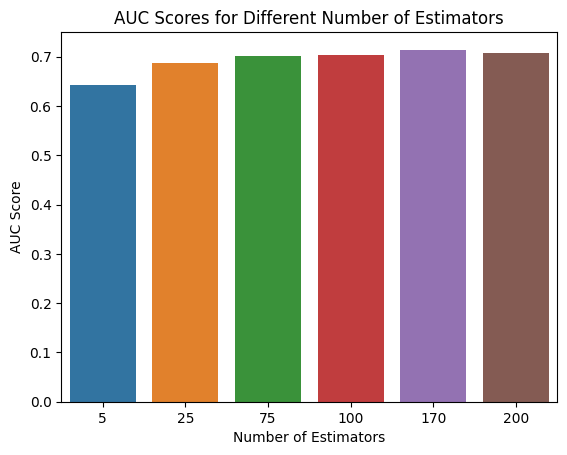

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

n_estimators_list = [5,100,25,75,170,200]
auc_scores = []
for n_estimators in n_estimators_list:
    # Initialize the AdaBoost Classifier
    gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators,max_features=9, random_state=50) #THIS ONE TAKES A LOOOOOOT OF TIME

    # Fit the classifier on the training data
    gb_classifier.fit(X_train, Y_train)

    # Predict probabilities on the test data
    probs = gb_classifier.predict_proba(X_test)

    # Extract the probabilities of the positive class
    positive_class_probs = probs[:, 1]

    # Calculate the AUC score
    auc_score = roc_auc_score(Y_test, positive_class_probs)
    auc_scores.append(auc_score)

    print('Number of estimators:', n_estimators)
    print('AUC score:', auc_score)
    print('---------------------------------------------------------')
# n_estimators_list = [50, 25, 50, 75, 100, 15, 10]
# auc_scores = []

# for est in n_estimators_list:
#     # Initialize the Gradient Boosting Classifier
#     gb_classifier = GradientBoostingClassifier(n_estimators=est, max_features=8, random_state=14)

#     # Fit the classifier on the training data
#     gb_classifier.fit(X_train, Y_train)

#     # Predict probabilities on the test data
#     probs = gb_classifier.predict_proba(X_test)

#     # Extract the probabilities of the positive class
#     positive_class_probs = probs[:, 1]

#     # Calculate the AUC score
#     auc_score = roc_auc_score(Y_test, positive_class_probs)
#     auc_scores.append(auc_score)

#     print('Number of estimators:', est)
#     print('AUC score:', auc_score)
#     print('---------------------------------------------------------')

# Plotting the bar graph using Seaborn
sns.barplot(x=n_estimators_list, y=auc_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different Number of Estimators')
plt.show()


In [ ]:
# gb_est = GradientBoostingClassifier(n_estimators=75, max_features=8, random_state=1)
# kfold = KFold(n_splits=10, shuffle=True, random_state=0)

gb_est = GradientBoostingClassifier(n_estimators=170,max_features=9, random_state=50)
gb_est.fit(X_train, Y_train)
kfold = KFold(n_splits=20, shuffle=True, random_state=0)
probabilities_train = cross_val_predict(gb_est, X_train, Y_train.ravel(), cv=kfold, method='predict_proba')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For training data

In [ ]:
Y_pred_train = [0 if p[0] > 0.5 else 1 for p in probabilities_train]

In [ ]:
cm_test = confusion_matrix(Y_train, Y_pred_train)
cm_test

array([[276,  24],
       [ 32, 268]])

In [ ]:
# GB CLASSIFIER
# Fit the classifier on the training data
# probabilities_train = cross_val_predict(gb_est, X_train, Y_train.ravel(), cv=kfold, method='predict_proba')
# Y_pred_train = [0 if p[0] > 0.5 else 1 for p in probabilities_train]


# Calculate scores
accuracy = accuracy_score(Y_train, Y_pred_train)
precision = precision_score(Y_train, Y_pred_train)
recall = recall_score(Y_train, Y_pred_train)
f1 = f1_score(Y_train, Y_pred_train)

# Print the scores
print("For training data:")
print("Accuracy : %.3f" % accuracy)
print("Precision : %.3f" % precision)
print("Recall : %.3f" % recall)
print("F1-score : %.3f" % f1)
# Calculate sensitivity (also known as recall or true positive rate)
sensitivity = cm_test[1, 1] / (cm_test[1, 1] + cm_test[1, 0])

# Calculate specificity (also known as true negative rate)
specificity = cm_test[0, 0] / (cm_test[0, 0] + cm_test[0, 1])

print("Sensitivity (Recall):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

For training data:
Accuracy : 0.907
Precision : 0.918
Recall : 0.893
F1-score : 0.905
Sensitivity (Recall): 0.8933333333333333
Specificity (True Negative Rate): 0.92


For test data

In [ ]:
gbt=gb_est.fit(X_train, Y_train)
test_pro=gbt.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [ ]:
test_pro
Y_pred_test = [0 if p[0] > 0.5 else 1 for p in test_pro]
print(Y_pred_test)
print(">>>>>>>>>>>>>>>>>>>>>>>>>")
print(Y_test)

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]
>>>>>>>>>>>>>>>>>>>>>>>>>
[1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1]


In [ ]:
cm_test = confusion_matrix(Y_test, Y_pred_test)
cm_test

array([[37, 11],
       [25, 26]])

In [ ]:
# Calculate scores
accuracy = accuracy_score(Y_test, Y_pred_test)
precision = precision_score(Y_test, Y_pred_test)
#recall = recall_score(Y_train, Y_pred_train)
f1 = f1_score(Y_test, Y_pred_test)

# Print the scores
print("For training data:")
print("Accuracy : %.3f" % accuracy)
print("Precision : %.3f" % precision)
#print("Recall : %.3f" % recall)
print("F1-score : %.3f" % f1)
# Calculate sensitivity (also known as recall or true positive rate)
sensitivity = cm_test[1, 1] / (cm_test[1, 1] + cm_test[1, 0])

# Calculate specificity (also known as true negative rate)
specificity = cm_test[0, 0] / (cm_test[0, 0] + cm_test[0, 1])

print("Sensitivity (Recall):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

For training data:
Accuracy : 0.636
Precision : 0.703
F1-score : 0.591
Sensitivity (Recall): 0.5098039215686274
Specificity (True Negative Rate): 0.7708333333333334


In [ ]:
#WITHOUT CROSS VAL
# Fit the classifier on the training data
gb_est.fit(X_train, Y_train)

# Predict probabilities on the test data
probs = gb_est.predict_proba(X_test)

Y_pred_test = [0 if p[0] > 0.5 else 1 for p in probs]


# Calculate scores
accuracy = accuracy_score(Y_test, Y_pred_test)
precision = precision_score(Y_test, Y_pred_test)
recall = recall_score(Y_test, Y_pred_test)
f1 = f1_score(Y_test, Y_pred_test)
positive_class_probs = probs[:, 1]
auc= roc_auc_score(Y_test, positive_class_probs)

# Print the scores
print("For testing data:")
print("Accuracy : %.3f" % accuracy)
print("Precision : %.3f" % precision)
print("Recall : %.3f" % recall)
print("F1-score : %.3f" % f1)
print("ROC: %.3f" % auc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For testing data:
Accuracy : 0.636
Precision : 0.703
Recall : 0.510
F1-score : 0.591
ROC: 0.714


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


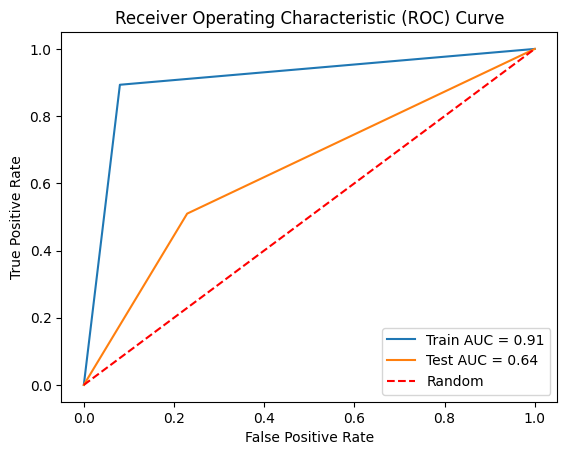

In [ ]:
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, Y_pred_train)
auc_train = roc_auc_score(Y_train, Y_pred_train)

# For test set
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_pred_test)
auc_test = roc_auc_score(Y_test, Y_pred_test)

# Plot the ROC curves
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
#SVM
# Define the SVM classifier
random_state = 50
svm_classifier = svm.SVC(random_state=random_state)
#svm_classifier = svm.SVC()


# C_range_rbf = [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]
# gamma_range_rbf = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
#param_dict_rbf = dict(gamma=gamma_range_rbf, C=C_range_rbf, kernel='rbf')

# Define the hyperparameters to tune
parameters = {
    'C': [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9],
    'gamma': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'kernel': ['rbf', 'poly']
}

grid_search=GridSearchCV(estimator=svm_classifier,param_grid=parameters,cv=10)
grid_search.fit(X_train,Y_train)

y_train_pred = grid_search.predict(X_train)

# Step 3: Calculate confusion matrix
cm = confusion_matrix(Y_train, y_train_pred)
print("Confusion Matrix:")
print(cm)





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Confusion Matrix:
[[295   5]
 [  2 298]]


In [ ]:
# Calculate scores
accuracy = accuracy_score(Y_train, y_train_pred)
precision = precision_score(Y_train, y_train_pred)
recall = recall_score(Y_train, y_train_pred)
f1 = f1_score(Y_train, y_train_pred)
auc_score = roc_auc_score(Y_train, y_train_pred)

# Print the scores
print("For training data:")
print("Accuracy : %.3f" % accuracy)
print("Precision : %.3f" % precision)
print("Recall : %.3f" % recall)
print("F1-score : %.3f" % f1)
print("AUC : %.3f"% auc_score)
# Calculate sensitivity (also known as recall or true positive rate)
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Calculate specificity (also known as true negative rate)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Sensitivity (Recall):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

For training data:
Accuracy : 0.988
Precision : 0.983
Recall : 0.993
F1-score : 0.988
AUC : 0.988333
Sensitivity (Recall): 0.6078431372549019
Specificity (True Negative Rate): 0.7291666666666666


In [ ]:
# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Evaluate the model with the best hyperparameters on the test set
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on test set: ", accuracy)

Best hyperparameters:  {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
Best accuracy:  0.8800000000000001
Accuracy on test set:  0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[35 13]
 [20 31]]


In [ ]:
# Calculate scores
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred)

# Print the scores
print("For training data:")
print("Accuracy : %.3f" % accuracy)
print("Precision : %.3f" % precision)
print("Recall : %.3f" % recall)
print("F1-score : %.3f" % f1)
print("AUC %.3f"% auc_score)
# Calculate sensitivity (also known as recall or true positive rate)
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Calculate specificity (also known as true negative rate)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Sensitivity (Recall):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

For training data:
Accuracy : 0.667
Precision : 0.705
Recall : 0.608
F1-score : 0.653
AUC 0.669
Sensitivity (Recall): 0.6078431372549019
Specificity (True Negative Rate): 0.7291666666666666


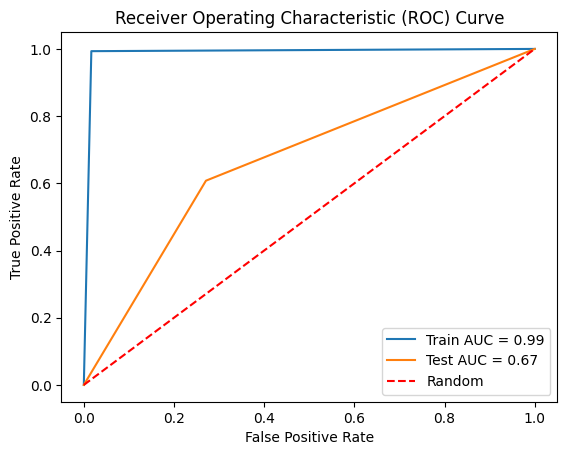

In [ ]:
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, y_train_pred)
auc_train = roc_auc_score(Y_train, y_train_pred)

# For test set
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, y_pred)
auc_test = roc_auc_score(Y_test, y_pred)

# Plot the ROC curves
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

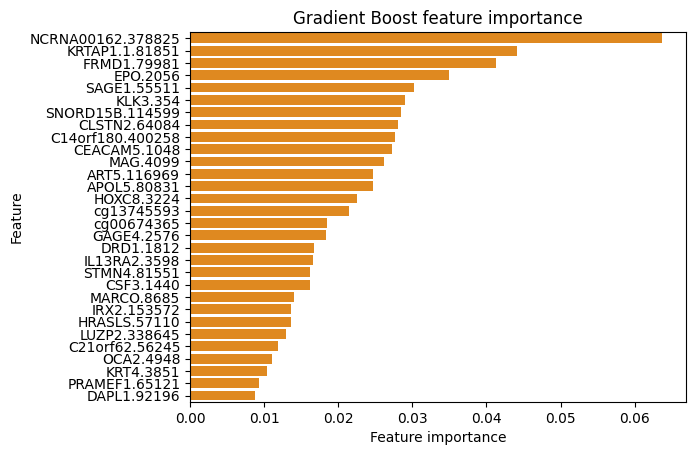

In [ ]:
feature_import = pd.DataFrame([LG.columns,gb_est.feature_importances_]).T
feature_import.columns = ['feature', 'importance']
feature_import.sort_values('importance', ascending=False, inplace=True)
sns.barplot(y='feature', x='importance', data=feature_import.head(30), color='darkorange')
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Gradient Boost feature importance')
feature_import
# Download the CSV file
feature_import.to_csv('feature_import.csv', index=True)
files.download('feature_import.csv')
# feature_import.head(18)

Survival Analysis

In [ ]:
from google.colab import files

In [ ]:
filtered_features = feature_import[feature_import.iloc[:, 1] > 0.010]
filtered_features.shape

(28, 2)

In [ ]:
filt_cols = LG[filtered_features.iloc[:, 0].tolist()]
filt_cols

NCRNA00162.378825  KRTAP1.1.81851  FRMD1.79981  EPO.2056  \
PatientID                                                                   
TCGA-2Y-A9GS-01          -0.234464        0.105272    -0.695263 -1.272244   
TCGA-2Y-A9GT-01          -0.234464       -0.481858    -1.015320 -0.150990   
TCGA-2Y-A9GV-01          -0.234464       -0.481858    -1.015320 -0.042265   
TCGA-2Y-A9GW-01           0.620636       -0.481858    -1.015320  0.926472   
TCGA-2Y-A9GY-01          -0.234464       -0.481858    -0.100791  1.531977   
...                            ...             ...          ...       ...   
TCGA-ED-A5KG-01           0.379297       -0.481858     0.868896 -0.617605   
TCGA-WX-AA46-01          -0.234464        0.207334    -0.037324 -0.901373   
TCGA-ZS-A9CE-01          -0.234464       -0.481858     0.927985 -0.815733   
TCGA-DD-AAVX-01          -0.234464        0.637512    -1.015320 -1.272244   
TCGA-DD-AAVV-01          -0.234464       -0.481858     0.160783 -0.753325   

                 SAGE1.55511  KLK3.354  SNORD15B.114599  CLSTN2.64084  \
PatientID                                                               
TCGA-2Y-A9GS-01    -0.345803 -0.365158        -0.496575     -0.431427   
TCGA-2Y-A9GT-01    -0.345803 -0.365158        -0.496575      0.011654   
TCGA-2Y-A9GV-01    -0.345803 -0.365158        -0.496575     -0.523129   
TCGA-2Y-A9GW-01    -0.345803 -0.365158        -0.496575     -0.034770   
TCGA-2Y-A9GY-01     0.533546 -0.365158        -0.496575     -0.780683   
...                      ...       ...              ...           ...   
TCGA-ED-A5KG-01     0.028938 -0.365158         0.326009      0.345171   
TCGA-WX-AA46-01    -0.345803 -0.365158        -0.496575      1.149488   
TCGA-ZS-A9CE-01    -0.345803 -0.365158         1.459916     -0.885261   
TCGA-DD-AAVX-01    -0.345803  0.379926        -0.496575      0.589621   
TCGA-DD-AAVV-01    -0.345803 -0.365158        -0.496575      0.607308   

                 C14orf180.400258  CEACAM5.1048  ...  IL13RA2.3598  \
PatientID                                        ...                 
TCGA-2Y-A9GS-01         -0.563255     -0.582596  ...     -0.339463   
TCGA-2Y-A9GT-01         -0.797923     -0.582596  ...     -0.321748   
TCGA-2Y-A9GV-01         -0.797923     -0.132719  ...     -0.855021   
TCGA-2Y-A9GW-01         -0.098939     -0.582596  ...     -0.392471   
TCGA-2Y-A9GY-01         -0.797923      0.560769  ...      1.293579   
...                           ...           ...  ...           ...   
TCGA-ED-A5KG-01         -0.797923      0.439462  ...      0.450586   
TCGA-WX-AA46-01          0.908147     -0.582596  ...      1.101549   
TCGA-ZS-A9CE-01         -0.365081     -0.582596  ...     -0.171881   
TCGA-DD-AAVX-01         -0.350526     -0.021936  ...     -1.214214   
TCGA-DD-AAVV-01         -0.299037     -0.205372  ...      0.032276   

                 STMN4.81551  CSF3.1440  MARCO.8685  IRX2.153572  \
PatientID                                                          
TCGA-2Y-A9GS-01    -0.480800  -0.606532    0.272544     0.353652   
TCGA-2Y-A9GT-01    -0.480800  -0.606532   -0.858502    -0.655702   
TCGA-2Y-A9GV-01    -0.480800   0.792627   -0.446641     0.246312   
TCGA-2Y-A9GW-01     0.559238  -0.606532    1.143012    -0.655702   
TCGA-2Y-A9GY-01    -0.480800  -0.000516    1.364878    -0.655702   
...                      ...        ...         ...          ...   
TCGA-ED-A5KG-01     0.265704  -0.606532   -1.107715    -0.054879   
TCGA-WX-AA46-01    -0.480800   1.123520    1.022336     0.505255   
TCGA-ZS-A9CE-01     0.870464  -0.606532   -0.097107     2.610597   
TCGA-DD-AAVX-01    -0.480800   0.472882   -0.792158    -0.655702   
TCGA-DD-AAVV-01    -0.480800  -0.606532    0.192225     0.597806   

                 HRASLS.57110  LUZP2.338645  C21orf62.56245  OCA2.4948  \
PatientID                                                                
TCGA-2Y-A9GS-01      0.178078     -0.778122        0.680448   0.009293   
TCGA-2Y-A9GT-01      0.640838     -0.778122    

In [ ]:
surv_Data = pd.merge(filt_cols, clinical_Data, left_index=True, right_index=True, how="left")
surv_Data = surv_Data.drop(['PatientID','tumor_tissue_site'], axis=1)
clinical_Data

Survival  Death     PatientID years_to_birth vital_status  \
PatientID_x                                                                  
TCGA-2V-A95S-01       NaN    NaN           NaN            NaN          NaN   
TCGA-2Y-A9GS-01     724.0    1.0  tcga-2y-a9gs             58            1   
TCGA-2Y-A9GT-01    1624.0    1.0  tcga-2y-a9gt             51            1   
TCGA-2Y-A9GV-01    2532.0    1.0  tcga-2y-a9gv             54            1   
TCGA-2Y-A9GW-01    1271.0    1.0  tcga-2y-a9gw             64            1   
...                   ...    ...           ...            ...          ...   
TCGA-WX-AA46-01     756.0    0.0  tcga-wx-aa46             61            0   
TCGA-ZS-A9CE-01    1241.0    0.0  tcga-zs-a9ce             79            0   
TCGA-DD-A4NJ-01     928.0    0.0  tcga-dd-a4nj             54            0   
TCGA-DD-AAVX-01    1570.0    0.0  tcga-dd-aavx             38            0   
TCGA-DD-AAVV-01    2455.0    0.0  tcga-dd-aavv             56            0   

                days_to_death days_to_last_followup tumor_tissue_site  \
PatientID_x                                                             
TCGA-2V-A95S-01           NaN                   NaN               NaN   
TCGA-2Y-A9GS-01           724                   NaN             liver   
TCGA-2Y-A9GT-01          1624                   NaN             liver   
TCGA-2Y-A9GV-01          2532                   NaN             liver   
TCGA-2Y-A9GW-01          1271                   NaN             liver   
...                       ...                   ...               ...   
TCGA-WX-AA46-01           NaN                   756             liver   
TCGA-ZS-A9CE-01           NaN                  1241             liver   
TCGA-DD-A4NJ-01           NaN                   928             liver   
TCGA-DD-AAVX-01           NaN                  1718             liver   
TCGA-DD-AAVV-01           NaN                  2455             liver   

                pathologic_stage pathology_T_stage pathology_N_stage  \
PatientID_x                                                            
TCGA-2V-A95S-01              NaN               NaN               NaN   
TCGA-2Y-A9GS-01         stage iv                t2                nx   
TCGA-2Y-A9GT-01          stage i                t1                nx   
TCGA-2Y-A9GV-01          stage i                t1                nx   
TCGA-2Y-A9GW-01          stage i                t1                n0   
...                          ...               ...               ...   
TCGA-WX-AA46-01         stage ii                t2                nx   
TCGA-ZS-A9CE-01         stage ii                t2                nx   
TCGA-DD-A4NJ-01         stage ii                t2                n0   
TCGA-DD-AAVX-01         stage ii                t2                n0   
TCGA-DD-AAVV-01         stage ii                t2                n0   

                pathology_M_stage  gender  \
PatientID_x                                 
TCGA-2V-A95S-01               NaN     NaN   
TCGA-2Y-A9GS-01                mx    male   
TCGA-2Y-A9GT-01                mx    male   
TCGA-2Y-A9GV-01                mx  female   
TCGA-2Y-A9GW-01                mx    male   
...                           ...     ...   
TCGA-WX-AA46-01                mx    male   
TCGA-ZS-A9CE-01                mx  female   
TCGA-DD-A4NJ-01                m0  female   
TCGA-DD-AAVX-01                m0    male   
TCGA-DD-AAVV-01                m0    male   

                date_of_initial_pathologic_diagnosis radiation_therapy  \
PatientID_x                                                              
TCGA-2V-A95S-01                                  NaN               NaN   
TCGA-2Y-A9GS-01                                 2006                no   
TCGA-2Y-A9GT-01                                 2006                no   
TCGA-2Y-A9GV-01                                 2007                no   
TCGA-2Y-A9GW-01                                 2007                no   
...        

In [ ]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 8.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=1dd444347ba3599f0d9087f047d8ec55082fdb1165f5c7b5685d71888e70aad2
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter, KaplanMeierFitter



In [ ]:
cph = CoxPHFitter()
cph.fit(sample_data, duration_col='Survival', event_col='Death')
cph.print_summary()
cph.plot()

KeyError: ignored

In [ ]:
surv_Data['Survival']

0       724.0
1      1624.0
2      2532.0
3      1271.0
4       757.0
        ...  
294     854.0
295     756.0
296    1241.0
297    1570.0
298    2455.0
Name: Survival, Length: 299, dtype: float64

In [ ]:
surv_Data

cg12036633  cg14453201  MYH1.4619  cg00674365  cg02767633  \
PatientID                                                                    
TCGA-2Y-A9GS-01   -3.934869   -0.372569     6.4071   -3.700242   -1.648986   
TCGA-2Y-A9GT-01   -4.195665    1.319381     0.0000    1.114395   -0.859163   
TCGA-2Y-A9GV-01   -0.121801   -3.069196     0.0000   -0.190199   -0.602283   
TCGA-2Y-A9GW-01   -0.235417   -0.249125     0.0000   -0.257036   -1.016317   
TCGA-2Y-A9GY-01   -4.195968   -4.440740     2.1425   -5.291615   -1.502893   
...                     ...         ...        ...         ...         ...   
TCGA-ED-A5KG-01   -0.291647   -1.094005     2.0171   -0.087371    3.317134   
TCGA-WX-AA46-01   -0.213592   -4.412207     0.0000   -5.310673    2.369393   
TCGA-ZS-A9CE-01   -0.210789    1.920194     0.0000    1.621164   -4.516270   
TCGA-DD-AAVX-01    3.180218   -0.819524     0.0000    2.261583    3.211289   
TCGA-DD-AAVV-01    3.101823   -3.506181    28.8978   -0.629118    2.869854   

                 cg14619259  MYH3.4621  cg15415945   MSC.9242  LUZP2.338645  \
PatientID                                                                     
TCGA-2Y-A9GS-01    0.920798    31.0498    2.694297  1887.8068        0.0000   
TCGA-2Y-A9GT-01    0.338144    45.7297    5.397047    86.0794        0.0000   
TCGA-2Y-A9GV-01   -0.790024    57.5296    0.250047    23.6887        3.3841   
TCGA-2Y-A9GW-01    0.068506    29.1188    4.009919  2699.3257        7.6628   
TCGA-2Y-A9GY-01   -4.637505    25.1741    4.413314   642.5495        1.0712   
...                     ...        ...         ...        ...           ...   
TCGA-ED-A5KG-01   -2.504322    54.4629    0.169481   918.6737        0.0000   
TCGA-WX-AA46-01   -0.209207    62.4625    5.760275    25.2252        0.0000   
TCGA-ZS-A9CE-01   -1.180263    38.2932   -0.773562    22.9759        1.6411   
TCGA-DD-AAVX-01    1.558961    61.9266    3.902750    66.5138        3.4404   
TCGA-DD-AAVV-01   -5.353430    30.9140    3.894772   791.8616        0.6720   

                 ...  pathology_T_stage  pathology_N_stage  pathology_M_stage  \
PatientID        ...                                                            
TCGA-2Y-A9GS-01  ...                 t2                 nx                 mx   
TCGA-2Y-A9GT-01  ...                 t1                 nx                 mx   
TCGA-2Y-A9GV-01  ...                 t1                 nx                 mx   
TCGA-2Y-A9GW-01  ...                 t1                 n0                 mx   
TCGA-2Y-A9GY-01  ...                 t2                 nx                 mx   
...              ...                ...                ...                ...   
TCGA-ED-A5KG-01  ...                 t2                 n0                 m0   
TCGA-WX-AA46-01  ...                 t2                 nx                 mx   
TCGA-ZS-A9CE-01  ...                 t2                 nx                 mx   
TCGA-DD-AAVX-01  ...                 t2                 n0                 m0   
TCGA-DD-AAVV-01  ...                 t2                 n0                 m0   

                 gender  date_of_initial_pathologic_diagnosis  \
PatientID                                                       
TCGA-2Y-A9GS-01    male                                  2006   
TCGA-2Y-A9GT-01    male                                  2006   
TCGA-2Y-A9GV-01  female                                  2007   
TCGA-2Y-A9GW-01    male                                  2007   
TCGA-2Y-A9GY-01  female                                  2007   
...                 ...                                   ...   
TCGA-ED-A5KG-01  female                                  2012   
TCGA-WX-AA46-01    male                                  2012   
TCGA-ZS-A9CE-01  female                                  2011   
TCGA-DD-AAVX-01    male                                  2008   
TCGA-DD-AAVV-01    male                                  2007   

                 radiation_therapy         histological_type  residual_tum